[680, 696] [774, 824]
优化算法 [[(680, 774), (696, 824)], 52.49761899362675]


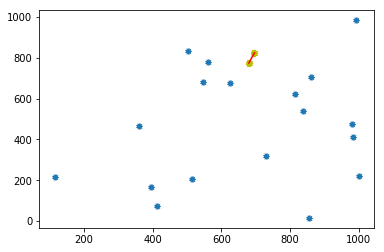

In [16]:
#求出平面中距离最近的点对（若存在多对，仅需求出一对）
import random
import math
import matplotlib.pyplot as plt
#计算两点的距离
def calDis(seq):
    dis=math.sqrt((seq[0][0]-seq[1][0])**2+(seq[0][1]-seq[1][1])**2)
    return dis

#生成器：生成横跨跨两个点集的候选点
def candidateDot(u,right,dis,med_x):
    cnt=0
    #遍历right（已按横坐标升序排序）。若横坐标小于med_x-dis则进入下一次循环；若横坐标大于med_x+dis则跳出循环；若点的纵坐标好是否落在在[u[1]-dis,u[1]+dis]，则返回这个点
    for v in right:
        if v[0]<med_x-dis:
           # print('left')
            continue
        if v[0]>med_x+dis:
           # print('right')
            break
        cnt=cnt+1
        if v[1]>=u[1]-dis and v[1]<=u[1]+dis:
            #print(cnt)
            yield v
   
#求出横跨两个部分的点的最小距离
def combine(left,right,resMin,med_x):
    dis=resMin[1]
    minDis=resMin[1]
    pair=resMin[0]
    for u in left:
        if u[0]<med_x-dis:
            continue
        #print("out")
        for v in candidateDot(u,right,dis,med_x):
            #print(v)
            dis=calDis([u,v])
            if dis<minDis:
                minDis=dis
                pair=[u,v]
    return [pair,minDis]
#分治求解
def divide(seq):
    #求序列元素数量
    n=len(seq)
    #按点的纵坐标升序排序
    seq=sorted(seq)
    #递归开始进行
    if n<=1:
        return None,float('inf')
    elif n==2:
        return [seq,calDis(seq)]
    else:
        half=int(len(seq)/2)
        med_x=(seq[half][0]+seq[-half-1][0])/2
        left=seq[:half]    
        resLeft=divide(left)
        right=seq[half:]
        resRight=divide(right)
        #获取两集合中距离最短的点对
        if resLeft[1]<resRight[1]:
            resMin=combine(left,right,resLeft,med_x)
        else:
            resMin=combine(left,right,resRight,med_x)
        pair=resMin[0]
        minDis=resMin[1]
    return [pair,minDis]   
def ret_x(seq):
    return seq[0]
def ret_y(seq):
    return seq[1]
seq=[(random.randint(0,1000),random.randint(0,1000)) for x in range(20)]
seq=sorted(seq,key=ret_x)#对所有点按照横坐标排序
seq_x=[]
seq_y=[]
for i in seq:
    seq_x.append(i[0])
    seq_y.append(i[1])
plt.scatter(seq_x,seq_y,marker=(9, 1, 30))
last=divide(seq)
print([last[0][0][0],last[0][1][0]],[last[0][0][1],last[0][1][1]])
plt.scatter([last[0][0][0],last[0][1][0]],[last[0][0][1],last[0][1][1]],color='y',marker=(9, 2, 30))
plt.plot([last[0][0][0],last[0][1][0]],[last[0][0][1],last[0][1][1]],color='r')
print("优化算法",last)